In [226]:
from pylab import rcParams
rcParams['figure.figsize'] = 8

import pandas as pd
import matplotlib.pyplot as plt

TypeError: object of type 'int' has no len()

In [41]:
basketball_players = pd.read_csv(
    f'datasets_1358_30676_Players.csv')
basketball_players.set_index(['Index'], inplace = True)
basketball_players = basketball_players[basketball_players['born'].notna()]
basketball_players['born'] = basketball_players['born'].astype('int')
basketball_players

,Player,height,weight,collage,born,birth_city,birth_state
Index,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996,Hendersonville,Tennessee


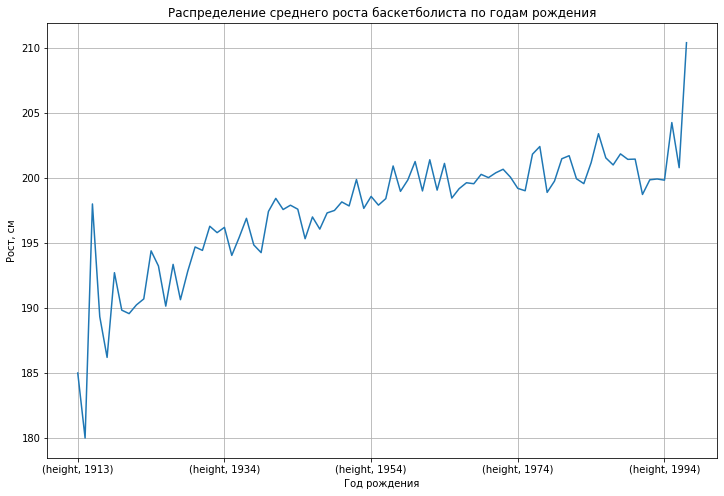

In [45]:
average_height = basketball_players.groupby('born').mean()
height = average_height[['height']]
height.unstack().plot()
plt.xlabel('Год рождения')
plt.ylabel('Рост, см')
plt.title('Распределение среднего роста баскетболиста по годам рождения')
plt.grid()

График оценивает средний рост баскетболиство NBA по записям от 1913. По графику однозначно видно, что средний рост рост баскетболиста растет. Здесь можно упомянуть фактор более сбалансированного питания и улучшевшегося качества жизни, что позволяет организму развиваться наиболее оптимально. 

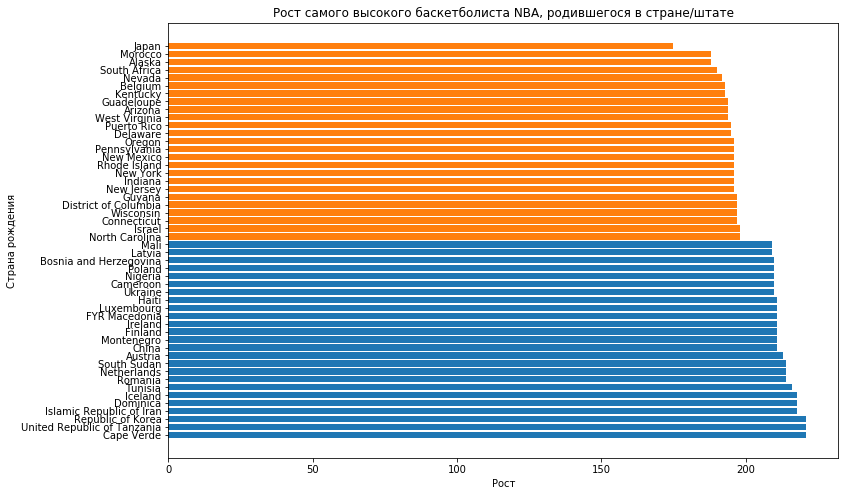

In [223]:
average_height_by_country = basketball_players.groupby('birth_state')[['height']].mean()
sorted_height = average_height_by_country.sort_values('height', ascending = False).head(25)
sorted_height['height'] = sorted_height['height'].astype('int')
plt.barh(sorted_height.index, sorted_height['height'])
plt.xlabel('Рост')
plt.ylabel('Страна рождения')
plt.title('Рост самого высокого баскетболиста NBA, родившегося в стране/штате')
plt.grid()
sorted_height = average_height_by_country('height', ascending = False).tail(25)
sorted_height['height'] = sorted_height['height'].astype('int')
plt.barh(sorted_height.index, sorted_height['height'])
plt.xlabel('Рост')
plt.ylabel('Страна рождения')
plt.title('Средний рост баскетболистов NBA из разных стран/штатов')
plt.grid()

График среднего роста баскетболистов в разных странах/штатах. Стоит отметить распределение восточных азиатских стран: Южная Корея и Китай находятся в топ-15 (Корея занимает третье место по среднему росту), а Япония находится на последнем месте, причем с заметным отставанием. Это может быть связано с особенностями диеты в Японии и её влияние на развитие организма, а также на генетическую изоляцию популяции Японии, приведшую к сниженному среднему росту. 

In [184]:
pollution = pd.read_csv(
    'Measurement_summary.csv', na_values = -1)
#pollution = pollution.drop('', axis=1)
pollution_at_station = pollution.groupby('Station code').mean()
pollution_at_station

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,,,,,,,,
101,37.572016,127.005007,0.004386,0.031631,0.024625,0.585477,38.010783,22.889185
102,37.564263,126.974676,0.003591,0.032300,0.025524,0.504854,37.988530,22.876385
103,37.540033,127.004850,0.003509,0.029887,0.021742,0.446590,35.827789,23.864330
104,37.609823,126.934848,0.004254,0.024848,0.028534,0.553679,42.754251,25.154242
105,37.593742,126.949679,0.004272,0.023963,0.025628,0.601378,42.494438,23.410106
106,37.555580,126.905598,0.003945,0.027241,0.024739,0.529104,47.856737,30.533499
107,37.541864,127.049659,0.004412,0.028818,0.021646,0.485051,49.918974,25.529944
108,37.547180,127.092493,0.004315,0.027827,0.023455,0.628947,45.842132,29.334506
109,37.575743,127.028885,0.005420,0.030053,0.022861,0.520897,39.082312,23.181757


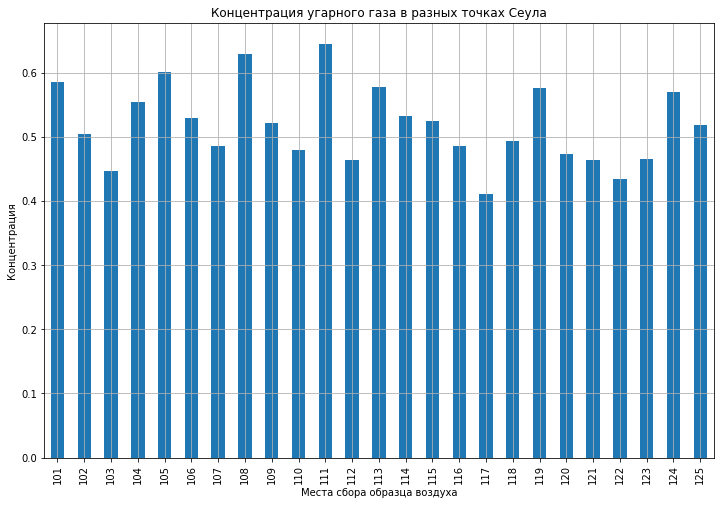

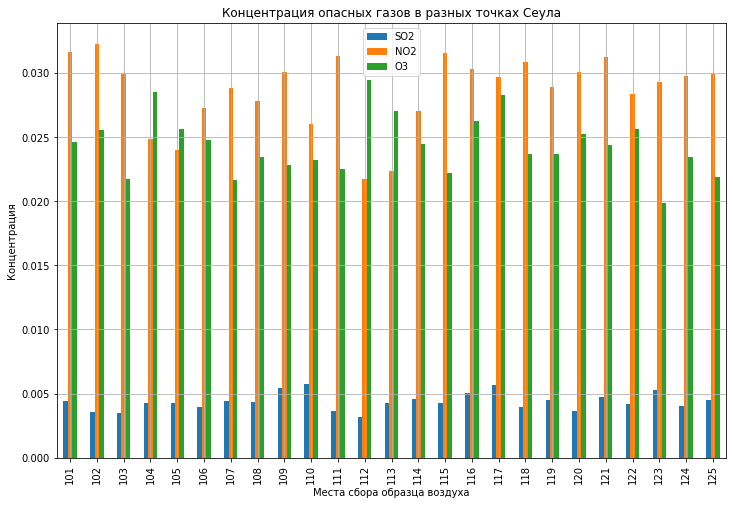

In [185]:
pollution_at_station = pollution_at_station.drop(['Latitude', 'Longitude', 'PM10', 'PM2.5'], axis=1)
pollution_at_station['CO'].plot(kind='bar')
plt.xlabel('Места сбора образца воздуха')
plt.ylabel('Концентрация')
plt.title('Концентрация угарного газа в разных точках Сеула')
plt.grid()
plt.show
pollution_at_station = pollution_at_station.drop(['CO'], axis=1)
pollution_at_station.plot(kind='bar')
plt.xlabel('Места сбора образца воздуха')
plt.ylabel('Концентрация')
plt.title('Концентрация опасных газов в разных точках Сеула')
plt.grid()


Графики распределения опасных химических веществ в разных районах Сеула. Визуально уровень загрязнения в городе равномерен, из-за чего можно сделать вывод, что возле станций сбора образца нет источников опасных веществ. 

In [186]:
import seaborn as sns

In [209]:
league = pd.read_csv('high_diamond_ranked_10min.csv')
league

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


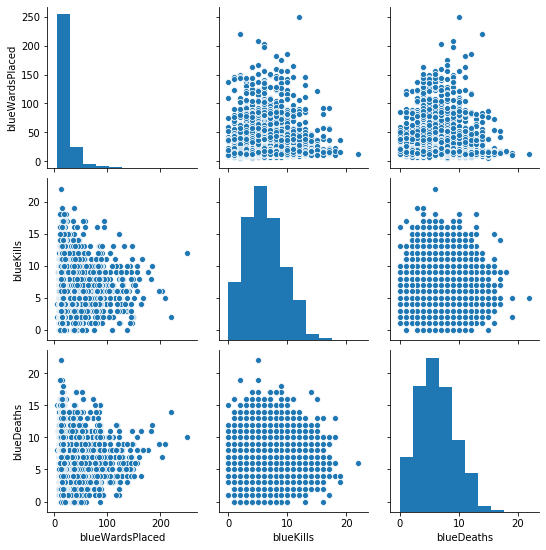

In [211]:
league_plot = sns.pairplot(
    league[['blueWardsPlaced', 'blueKills', 'blueDeaths']])
league_plot

Графики связи между установкой "вардов" (смотровых точек, если упрощенно), убийствами и смертями игроков в League of Legends на высоких рангах мастерства. Распределения смертей и убийств выглядят одинаково (что говорит о сбалансированности игрового процесса), а вот статистика точек открытой карты и смертей говорит о том, что корреляции как таковой особо нет, несмотря на логически очевидную нулевую гипотезу о том, что знание перемещений врага дает большее преимущество.

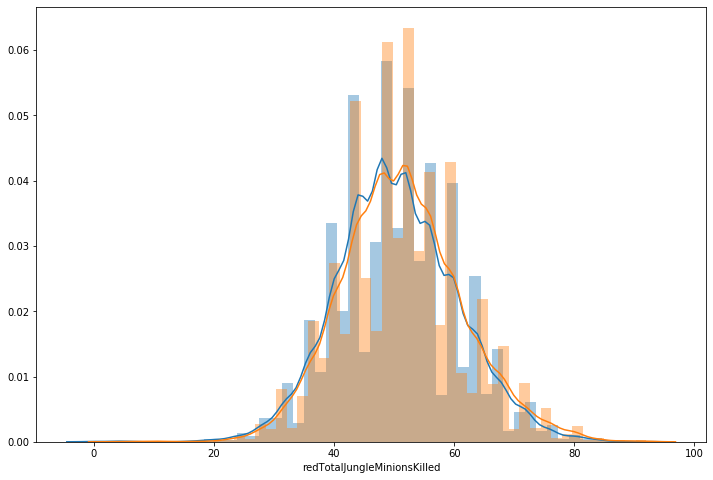

In [225]:
sns.distplot(league.blueTotalJungleMinionsKilled)
sns.distplot(league.redTotalJungleMinionsKilled)

Сравнение распределений убийства нейтральных существ в играх League of legends на высоких рангах. Практически идентичные распределения указывают на превосходный баланс карты, не дающий преимуществ ни одной из соперничающих команд.